# Taller de Machine Learning: Predicción del Valor Medio de Viviendas

## Objetivo
Como consultor experto en Machine Learning, tu misión es guiar a un equipo a través del proceso completo de desarrollo de un modelo de ML capaz de predecir el valor medio de viviendas ocupadas por sus propietarios (**MEDV**), valiéndote de distintas características de las ciudades. Esta experiencia abarcará desde la etapa inicial de exploración y preparación de datos, pasando por la selección y entrenamiento de modelos, hasta la evaluación y ajuste de los mismos. Prepararás al equipo para enfrentar desafíos reales en el campo del análisis predictivo, asegurando que adquieran competencias clave para manipular datos, elegir el modelo adecuado y afinar su rendimiento para lograr predicciones precisas.

### 1. Introducción al Dataset
El dataset que servirá como nuestro campo de entrenamiento contiene información detallada sobre diversas características urbanas que se relacionan con el valor medio de las propiedades residenciales. Deberás familiarizarte y posteriormente instruir al equipo sobre cómo manejar datos que incluyen:

1. **CRIM**: Tasa de criminalidad per cápita por ciudad.
2. **ZN**: Proporción de terreno residencial zonificado para lotes de mayor tamaño.
3. **INDUS**: Proporción de espacios comerciales no minoristas.
4. **CHAS**: Presencia del río Charles.
5. **NOX**: Niveles de contaminación por óxidos nítricos.
6. **RM**: Promedio de habitaciones por vivienda.
7. **EDAD**: Antigüedad de los inmuebles.
8. **DIS**: Proximidad a centros de empleo en Boston.
9. **RAD**: Acceso a carreteras radiales.
10. **IMPUESTO**: Carga impositiva.
11. **PTRATIO**: Relación alumno-maestro.
12. **B**: Proporción de residentes afroamericanos.
13. **LSTAT**: Porcentaje de población con estatus socioeconómico bajo.

#### Variable de Salida
- **MEDV**: Precio medio de los inmuebles.

### 2. Exploración de Datos
El primer desafío será sumergirse en los datos para descubrir patrones, tendencias y anomalías que podrían influir en los precios de las viviendas. Deberás enseñar cómo:

- Realizar un análisis estadístico básico.
- Visualizar la distribución de los datos mediante histogramas.
- Identificar correlaciones significativas.

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [2]:
URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRsiTDcareqHY_yEk3vfLp6QQOwNWCqzmHhbemKrsHsrMNQN1pz7EojJ5qRNd4AofHg2kP4RwNWJzAn/pub?output=csv'

df = pd.read_csv(URL)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,EDAD,DIS,RAD,IMPUESTO,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   EDAD      506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   IMPUESTO  506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,EDAD,DIS,RAD,IMPUESTO,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'EDAD'}>,
        <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>,
        <Axes: title={'center': 'IMPUESTO'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

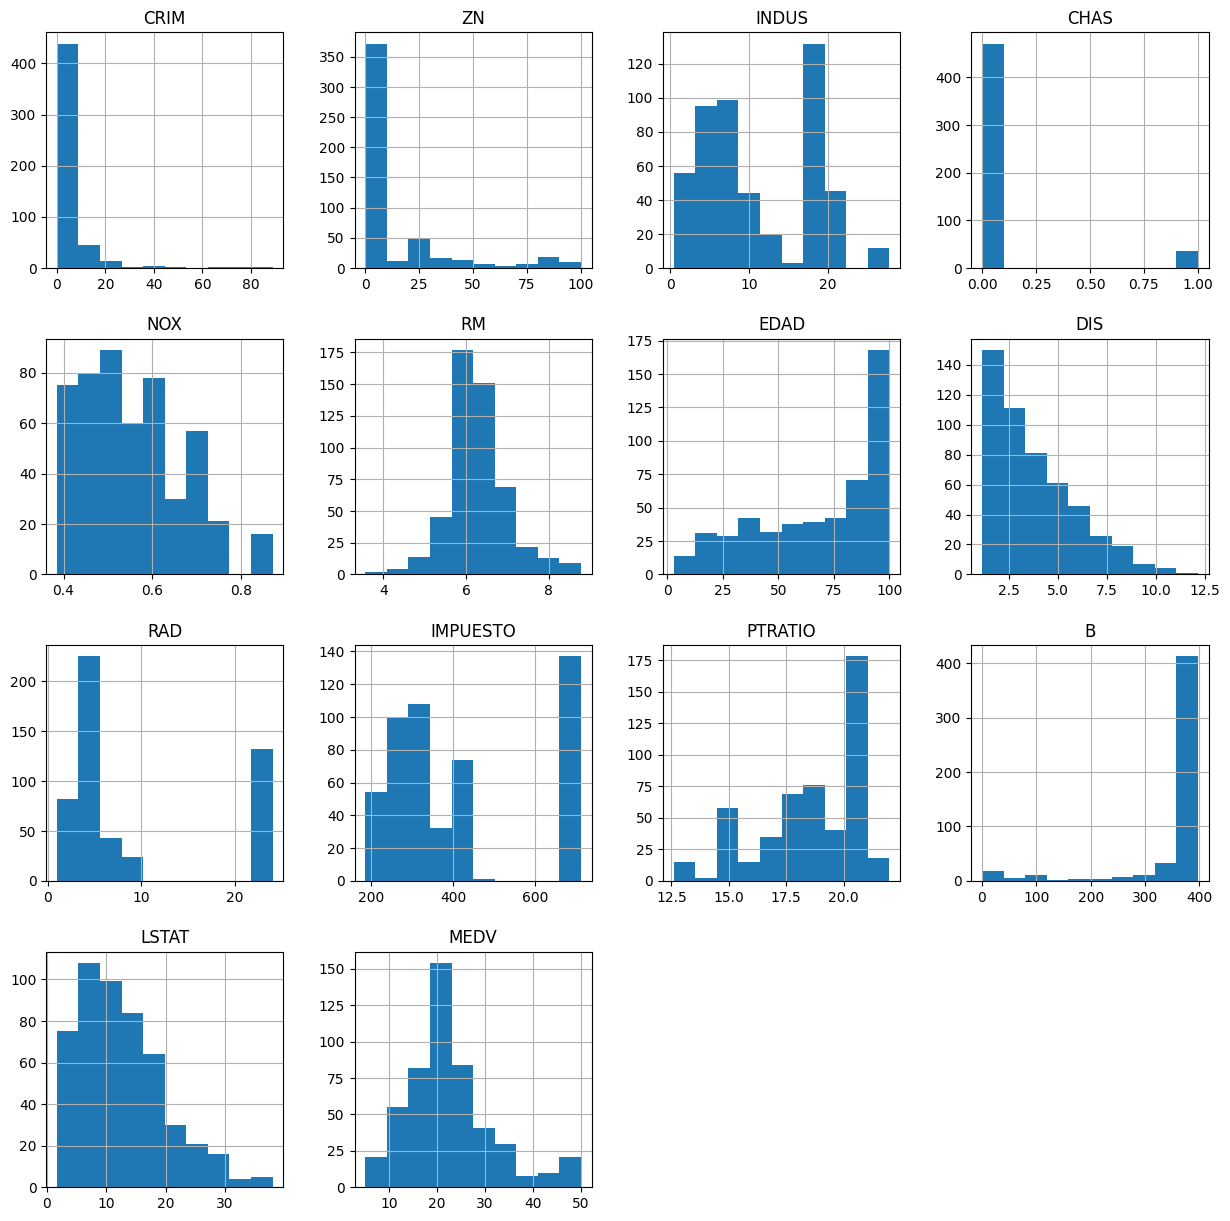

In [5]:
df.hist(figsize=(15,15))

<Axes: >

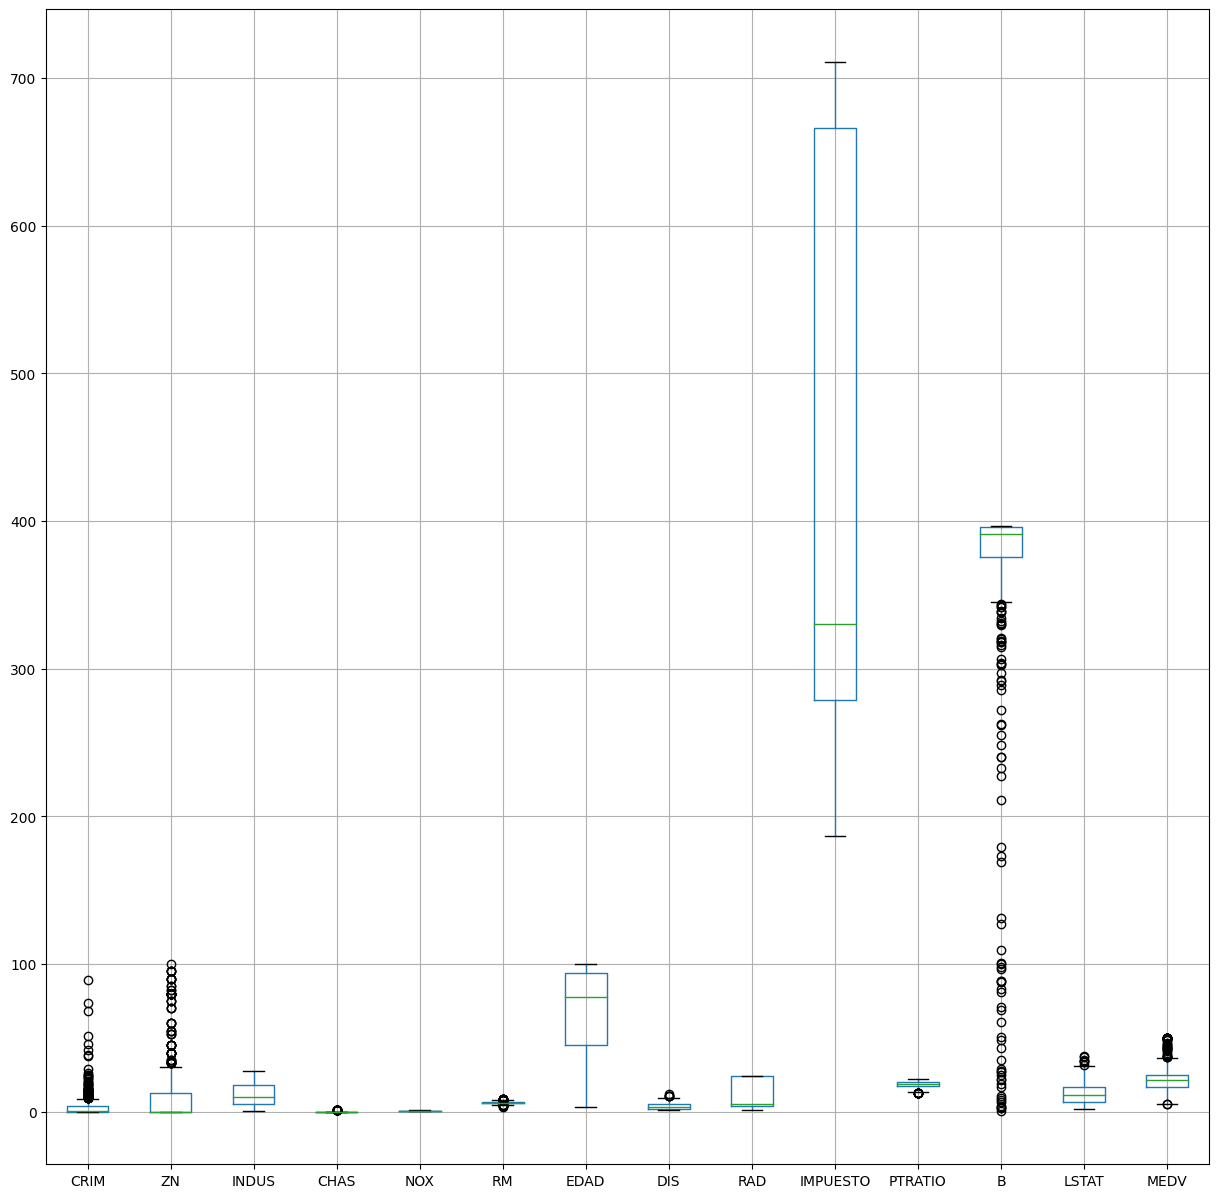

In [46]:
df.boxplot(figsize=(15,15))

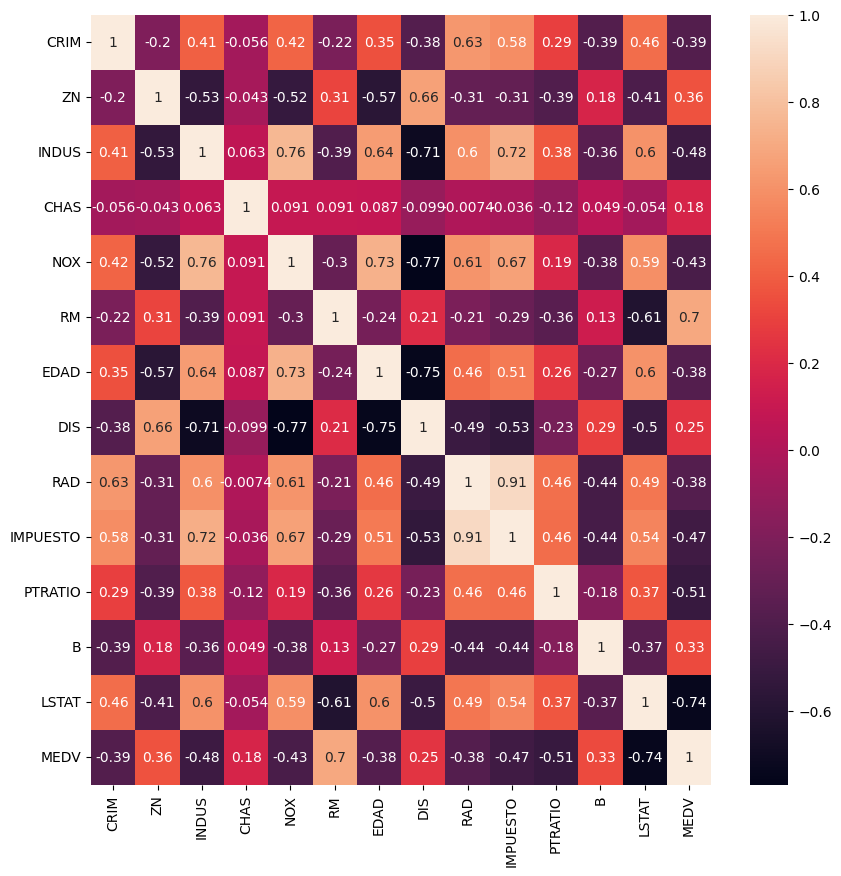

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(
    df.corr(),
    annot=True)
plt.show()

array([[<Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='ZN', ylabel='CRIM'>,
        <Axes: xlabel='INDUS', ylabel='CRIM'>,
        <Axes: xlabel='CHAS', ylabel='CRIM'>,
        <Axes: xlabel='NOX', ylabel='CRIM'>,
        <Axes: xlabel='RM', ylabel='CRIM'>,
        <Axes: xlabel='EDAD', ylabel='CRIM'>,
        <Axes: xlabel='DIS', ylabel='CRIM'>,
        <Axes: xlabel='RAD', ylabel='CRIM'>,
        <Axes: xlabel='IMPUESTO', ylabel='CRIM'>,
        <Axes: xlabel='PTRATIO', ylabel='CRIM'>,
        <Axes: xlabel='B', ylabel='CRIM'>,
        <Axes: xlabel='LSTAT', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>],
       [<Axes: xlabel='CRIM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='NOX', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='EDAD', ylabel='ZN'>,
        <Axes: xlabel='DIS', ylabel='ZN'>,
        <

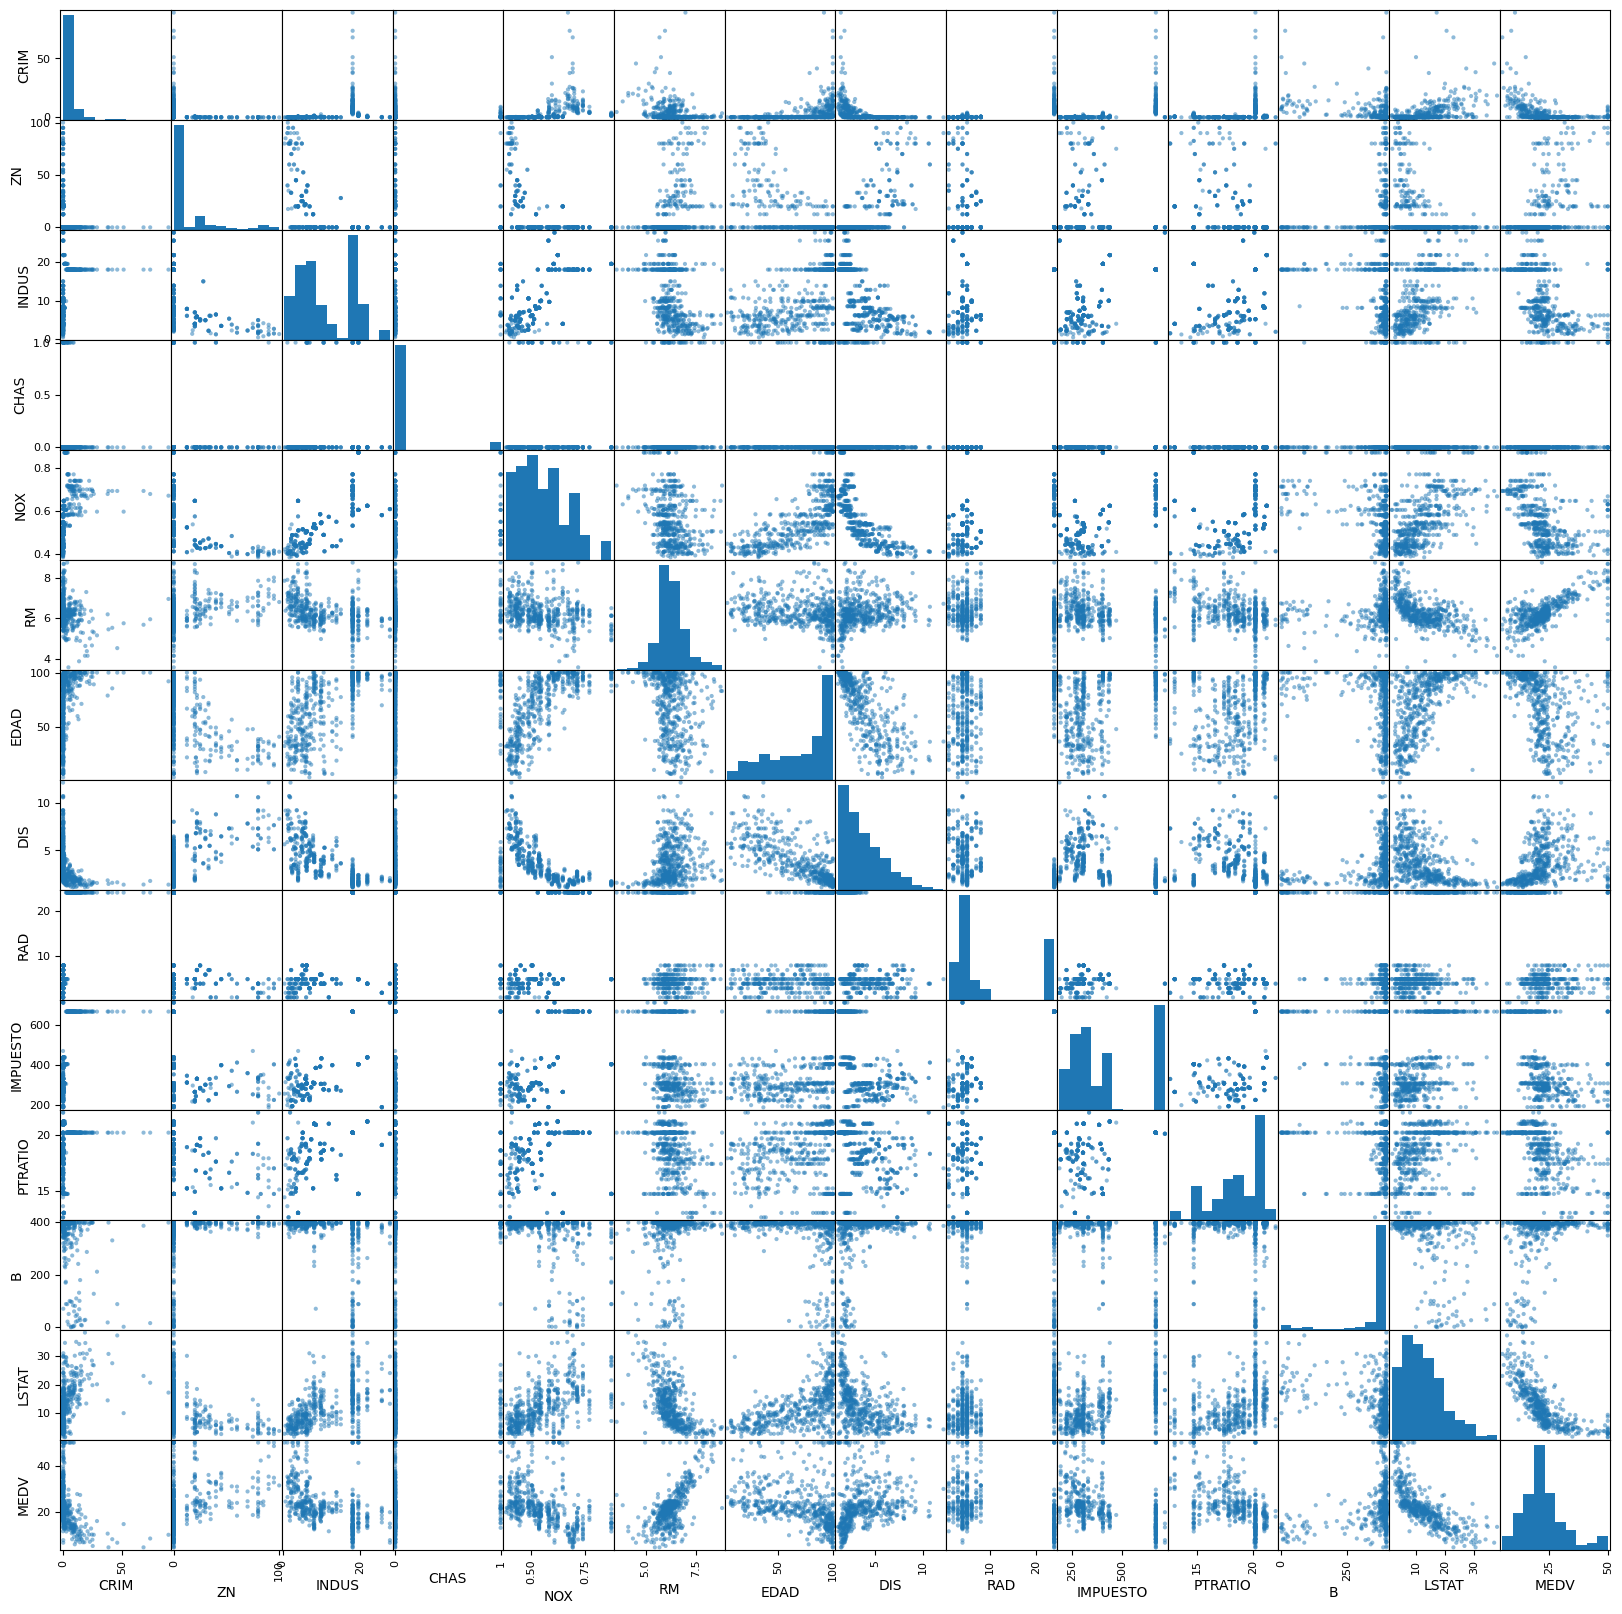

In [7]:
scatter_matrix(df, figsize=(20,20))

In [8]:
corr_list = df.corr()['MEDV'].values

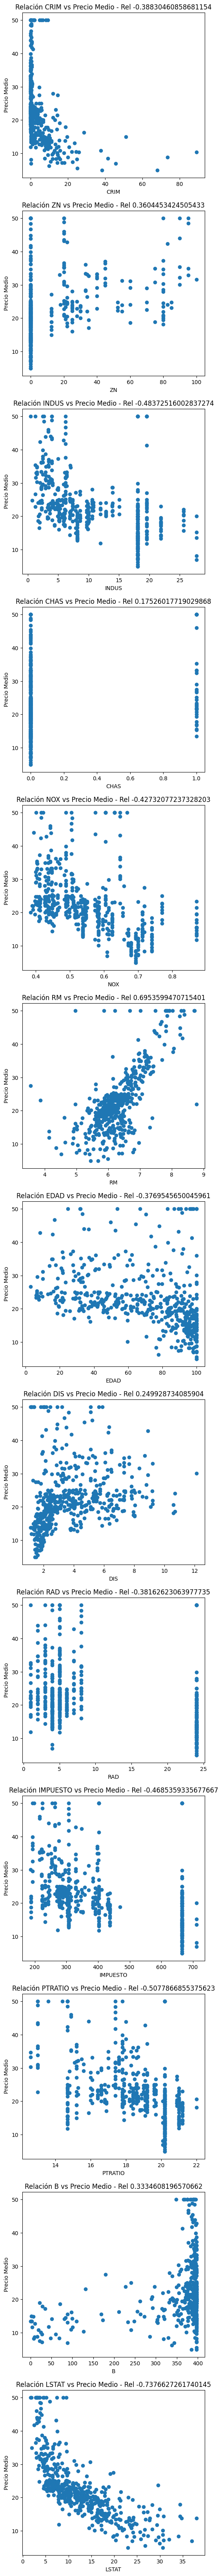

In [9]:
x_columns_names = df.columns.to_list()

num_filas = df.shape[1]
fig, ax = plt.subplots(num_filas-1, 1, figsize=(6, num_filas*6))

for i, column in enumerate (df.columns.drop('MEDV')):
  ax[i].scatter(df[column], df['MEDV'])
  ax[i].set_title('Relación {} vs Precio Medio - Rel {}'.format(column,corr_list[i]))
  ax[i].set_xlabel(column)
  ax[i].set_ylabel('Precio Medio')

### 3. Preparación de Datos
Antes de poder entrenar un modelo efectivo, deberás liderar el proceso de limpieza y preparación de datos, que incluye:

- El manejo de valores ausentes o incorrectos.
- La normalización de las características para que se encuentren en la misma escala.
- La codificación de variables categóricas.


No contiene valores nulos.
Se decidió categorizar algunas columnas como RAD e IMPUESTO

In [10]:
df_preprocess = df

In [11]:
df_preprocess.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,EDAD,DIS,RAD,IMPUESTO,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [47]:
X_columns_name = df_preprocess.columns.drop('MEDV')
y_column_name = 'MEDV'

In [13]:
X_data = df_preprocess.drop(y_column_name, axis=1)
y_data = df_preprocess[y_column_name]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data.values, y_data.values, test_size=0.15, random_state=42)

X_train = pd.DataFrame(X_train, columns=X_columns_name)
X_test = pd.DataFrame(X_test, columns=X_columns_name)

In [15]:
X_train.shape

(430, 13)

In [16]:
X_test.shape

(76, 13)

In [17]:
def column_data_categorize(df, column_name, bins, labels):
  return pd.cut(df[column_name], bins = bins, labels = labels)

In [18]:
# Categorizar columna RAD
rad_bins = [0, (df['RAD'].max() - df['RAD'].min())/2, float('inf')]
tad_labels = ['Bajo','Alto']

X_train['RAD'] = column_data_categorize(X_train, 'RAD', rad_bins, tad_labels)

In [19]:
# Categorizar columna IMPUESTO
impuesto_bins = [0, df['IMPUESTO'].quantile(0.33), df['IMPUESTO'].quantile(0.66), float('inf')]
impuesto_labels = ['Bajo','Medio','Alto']

X_train['IMPUESTO'] = column_data_categorize(X_train, 'IMPUESTO', impuesto_bins, impuesto_labels)

In [48]:
df['IMPUESTO'].quantile(0.33)

300.0

In [49]:
df['IMPUESTO'].quantile(0.66)

403.0

In [20]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,EDAD,DIS,RAD,IMPUESTO,PTRATIO,B,LSTAT
0,0.13960,0.0,8.56,0.0,0.5200,6.167,90.0,2.4210,Bajo,Medio,20.9,392.69,12.33
1,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,Bajo,Bajo,14.7,392.78,3.81
2,15.87440,0.0,18.10,0.0,0.6710,6.545,99.1,1.5192,Alto,Alto,20.2,396.90,21.08
3,0.18337,0.0,27.74,0.0,0.6090,5.414,98.3,1.7554,Bajo,Alto,20.1,344.05,23.97
4,0.12816,12.5,6.07,0.0,0.4090,5.885,33.0,6.4980,Bajo,Medio,18.9,396.90,8.79


In [21]:
categorical_columns = ['CHAS','RAD','IMPUESTO']
numerical_columns = [value for value in X_columns_name if value not in categorical_columns]
numerical_columns

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'EDAD', 'DIS', 'PTRATIO', 'B', 'LSTAT']

In [22]:
# Preprocesamiento Variables Categóricas
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoder_data = encoder.fit_transform(X_train[categorical_columns])

# pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(categorical_columns))

In [23]:
X_train_encoder_data.shape

(430, 4)

In [24]:
# Preprocesamiento Variables Numéricas
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std_scaler_data = std_scaler.fit_transform(X_train[numerical_columns])

# pd.DataFrame(std_scaler_data, columns=std_scaler.get_feature_names_out(numerical_columns))

In [25]:
X_train_std_scaler_data.shape

(430, 10)

In [26]:
X_train_preprocess = np.hstack((X_train_encoder_data,X_train_std_scaler_data))

In [27]:
X_test['RAD'] = column_data_categorize(X_test, 'RAD', rad_bins, tad_labels)
X_test['IMPUESTO'] = column_data_categorize(X_test, 'IMPUESTO', impuesto_bins, impuesto_labels)

In [28]:
# Utiilizamos las transformaciones definidas con anterioridad
X_test_encoder_data = encoder.transform(X_test[categorical_columns])
X_test_std_scaler_data = std_scaler.transform(X_test[numerical_columns])

X_test_preprocess = np.hstack((X_test_encoder_data,X_test_std_scaler_data))

### 4. Selección de Modelo
Guiarás al equipo a través de la evaluación de varios modelos de regresión para determinar cuál es el más adecuado para nuestro caso de uso específico.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score, make_scorer

from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'LinearRegression': {},
    'Ridge': {
        'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'Lasso': {
        'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]
    },
    'KNeighborsRegressor': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'DecisionTreeRegressor': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestRegressor': {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    'ElasticNet': {},
    'BayesianRidge': {},
    'LogisticRegression': {
        'multi_class' : 'ovr'
    }
}

In [31]:
models = {
    'LinearRegression': [LinearRegression(), param_grid['LinearRegression']],
    'Ridge': [Ridge(),param_grid['Ridge']],
    'Lasso': [Lasso(),param_grid['Lasso']],
    'KNeighborsRegressor': [KNeighborsRegressor(),param_grid['KNeighborsRegressor']],
    'DecisionTreeRegressor': [DecisionTreeRegressor(),param_grid['DecisionTreeRegressor']],
    'RandomForestRegressor': [RandomForestRegressor(),param_grid['RandomForestRegressor']],
    'SVR': [SVR(),param_grid['SVR']],
    'ElasticNet': [ElasticNet(),param_grid['ElasticNet']],
    'BayesianRidge': [BayesianRidge(),param_grid['BayesianRidge']],
    'LogisticRegression': [LogisticRegression(),param_grid['LogisticRegression']]
}

### 5. Entrenamiento de Modelo
En esta fase, es crucial que instruyas sobre cómo dividir los datos en conjuntos de entrenamiento y prueba y proceder con el entrenamiento efectivo del modelo seleccionado.



In [32]:
def apply_grid_search(models_dict, model_name, X, y):
  for model_key, model_value in models.items():
    if model_key == model_name:
      grid_search = GridSearchCV(estimator=model_value[0], param_grid=model_value[1], cv=5, scoring='r2')
      grid_search.fit(X, y)
      models_dict[model_value[0].__class__.__name__] = [grid_search.best_estimator_,model_value[1]]
      print(f'Mejor R2: {grid_search.best_score_}')
      return models_dict

In [33]:
%%time

# Ejecución individual para BayesianRidge
models = apply_grid_search(models,'BayesianRidge', X_train_preprocess, y_train)
print(json.dumps(models['BayesianRidge'][0].get_params(),indent=3))
print('')

Mejor R2: 0.7027235071239853
{
   "alpha_1": 1e-06,
   "alpha_2": 1e-06,
   "alpha_init": null,
   "compute_score": false,
   "copy_X": true,
   "fit_intercept": true,
   "lambda_1": 1e-06,
   "lambda_2": 1e-06,
   "lambda_init": null,
   "n_iter": 300,
   "tol": 0.001,
   "verbose": false
}

CPU times: user 16.4 ms, sys: 2.81 ms, total: 19.2 ms
Wall time: 45.4 ms


In [34]:
%%time

# Ejecución individual para ElasticNet
models = apply_grid_search(models,'ElasticNet', X_train_preprocess, y_train)
print(json.dumps(models['ElasticNet'][0].get_params(),indent=3))
print('')

Mejor R2: 0.6156511190073722
{
   "alpha": 1.0,
   "copy_X": true,
   "fit_intercept": true,
   "l1_ratio": 0.5,
   "max_iter": 1000,
   "positive": false,
   "precompute": false,
   "random_state": null,
   "selection": "cyclic",
   "tol": 0.0001,
   "warm_start": false
}

CPU times: user 11.9 ms, sys: 927 µs, total: 12.8 ms
Wall time: 14.4 ms


In [35]:
%%time

# Ejecución individual para LinearRegression
models = apply_grid_search(models,'LinearRegression', X_train_preprocess, y_train)
print(json.dumps(models['LinearRegression'][0].get_params(),indent=3))
print('')

Mejor R2: 0.7027406343728677
{
   "copy_X": true,
   "fit_intercept": true,
   "n_jobs": null,
   "positive": false
}

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 26.1 ms


In [36]:
%%time

# Ejecución individual para Ridge
models = apply_grid_search(models,'Ridge', X_train_preprocess, y_train)
print(json.dumps(models['Ridge'][0].get_params(),indent=3))
print('')

Mejor R2: 0.7030495152013667
{
   "alpha": 1.0,
   "copy_X": true,
   "fit_intercept": true,
   "max_iter": null,
   "positive": false,
   "random_state": null,
   "solver": "sparse_cg",
   "tol": 0.0001
}

CPU times: user 719 ms, sys: 7.47 ms, total: 726 ms
Wall time: 750 ms


In [37]:
%%time

# Ejecución individual para Lasso
models = apply_grid_search(models,'Lasso', X_train_preprocess, y_train)
print(json.dumps(models['Lasso'][0].get_params(),indent=3))
print('')

Mejor R2: 0.6966261709945523
{
   "alpha": 0.1,
   "copy_X": true,
   "fit_intercept": true,
   "max_iter": 1000,
   "positive": false,
   "precompute": false,
   "random_state": null,
   "selection": "cyclic",
   "tol": 0.0001,
   "warm_start": false
}

CPU times: user 43 ms, sys: 15 µs, total: 43 ms
Wall time: 44.3 ms


In [38]:
%%time

# Ejecución individual para KNeighborsRegressor
models = apply_grid_search(models,'KNeighborsRegressor', X_train_preprocess, y_train)
print(json.dumps(models['KNeighborsRegressor'][0].get_params(),indent=3))
print('')

Mejor R2: 0.8207973330670424
{
   "algorithm": "auto",
   "leaf_size": 30,
   "metric": "minkowski",
   "metric_params": null,
   "n_jobs": null,
   "n_neighbors": 3,
   "p": 2,
   "weights": "distance"
}

CPU times: user 509 ms, sys: 13.3 ms, total: 522 ms
Wall time: 450 ms


In [39]:
%%time

# Ejecución individual para DecisionTreeRegressor
models = apply_grid_search(models,'DecisionTreeRegressor', X_train_preprocess, y_train)
print(json.dumps(models['DecisionTreeRegressor'][0].get_params(),indent=3))
print('')

Mejor R2: 0.8078596584415945
{
   "ccp_alpha": 0.0,
   "criterion": "squared_error",
   "max_depth": 5,
   "max_features": null,
   "max_leaf_nodes": null,
   "min_impurity_decrease": 0.0,
   "min_samples_leaf": 4,
   "min_samples_split": 2,
   "min_weight_fraction_leaf": 0.0,
   "random_state": null,
   "splitter": "best"
}

CPU times: user 563 ms, sys: 4.82 ms, total: 568 ms
Wall time: 577 ms


In [40]:
%%time

# Ejecución individual para RandomForestRegressor
models = apply_grid_search(models,'RandomForestRegressor', X_train_preprocess, y_train)
print(json.dumps(models['RandomForestRegressor'][0].get_params(),indent=3))
print('')

Mejor R2: 0.8493054339138219
{
   "bootstrap": true,
   "ccp_alpha": 0.0,
   "criterion": "squared_error",
   "max_depth": 10,
   "max_features": 1.0,
   "max_leaf_nodes": null,
   "max_samples": null,
   "min_impurity_decrease": 0.0,
   "min_samples_leaf": 1,
   "min_samples_split": 2,
   "min_weight_fraction_leaf": 0.0,
   "n_estimators": 100,
   "n_jobs": null,
   "oob_score": false,
   "random_state": null,
   "verbose": 0,
   "warm_start": false
}

CPU times: user 1min 13s, sys: 266 ms, total: 1min 13s
Wall time: 1min 14s


In [41]:
%%time

# Ejecución individual para SVR
models = apply_grid_search(models,'SVR', X_train_preprocess, y_train)
print(json.dumps(models['SVR'][0].get_params(),indent=3))
print('')

Mejor R2: 0.8243586790557348
{
   "C": 10,
   "cache_size": 200,
   "coef0": 0.0,
   "degree": 3,
   "epsilon": 0.1,
   "gamma": "scale",
   "kernel": "rbf",
   "max_iter": -1,
   "shrinking": true,
   "tol": 0.001,
   "verbose": false
}

CPU times: user 1.64 s, sys: 1.29 ms, total: 1.64 s
Wall time: 1.64 s


### 6. Evaluación de Modelo
Un paso crítico es aprender a evaluar la precisión y efectividad del modelo utilizando métricas específicas, identificando áreas de mejora.





In [42]:
def print_models_results(type_result, models_dict, X, y):
  results_model = {}
  print(f'SCORE EN {type_result}')
  for model_key, model_value in models_dict.items():
    try:
      y_pred = model_value[0].predict(X)
      print(f'- Modelo {model_key}')
      mse_train = mean_squared_error(y, y_pred)
      r2_train = r2_score(y, y_pred)
      print(f'\t MSE -> {round(mse_train,3)}')
      print(f'\t R2 -> {round(r2_train,3)}')
      results_model[model_key] = [round(mse_train,3), round(r2_train,3)]
    except Exception as e:
      print(e)

  return results_model

In [50]:
train_results_model = print_models_results('ENTRENAMIENTO', models, X_train_preprocess, y_train)

SCORE EN ENTRENAMIENTO
- Modelo LinearRegression
	 MSE -> 23.799
	 R2 -> 0.728
- Modelo Ridge
	 MSE -> 23.805
	 R2 -> 0.728
- Modelo Lasso
	 MSE -> 24.616
	 R2 -> 0.719
- Modelo KNeighborsRegressor
	 MSE -> 0.0
	 R2 -> 1.0
- Modelo DecisionTreeRegressor
	 MSE -> 9.261
	 R2 -> 0.894
- Modelo RandomForestRegressor
	 MSE -> 2.106
	 R2 -> 0.976
- Modelo SVR
	 MSE -> 9.904
	 R2 -> 0.887
- Modelo ElasticNet
	 MSE -> 32.673
	 R2 -> 0.627
- Modelo BayesianRidge
	 MSE -> 23.897
	 R2 -> 0.727
This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [51]:
test_results_model = print_models_results('TESTEO', models, X_test_preprocess, y_test)

SCORE EN TESTEO
- Modelo LinearRegression
	 MSE -> 15.062
	 R2 -> 0.769
- Modelo Ridge
	 MSE -> 14.875
	 R2 -> 0.772
- Modelo Lasso
	 MSE -> 13.95
	 R2 -> 0.786
- Modelo KNeighborsRegressor
	 MSE -> 6.39
	 R2 -> 0.902
- Modelo DecisionTreeRegressor
	 MSE -> 9.071
	 R2 -> 0.861
- Modelo RandomForestRegressor
	 MSE -> 8.694
	 R2 -> 0.867
- Modelo SVR
	 MSE -> 5.721
	 R2 -> 0.912
- Modelo ElasticNet
	 MSE -> 16.881
	 R2 -> 0.742
- Modelo BayesianRidge
	 MSE -> 14.345
	 R2 -> 0.78
This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


## Conclusión
Al concluir habrás capacitado al equipo no solo para desarrollar un modelo de ML robusto y fiable sino también para enfrentarse con confianza a desafíos analíticos complejos en el futuro. Este modele representa una oportunidad invaluable para adentrarse de lleno en el aprendizaje automático aplicado y prepararse para contribuir significativamente en el ámbito del análisis predictivo.

In [45]:
results_models_order = dict(sorted(results_model.items(), key=lambda item: item[1][1], reverse=True))

for key, value in results_models_order.items():
  print(f'- Modelo {key}')
  print(f'\t R2 -> {value[1]}')
  print(f'\t MSE -> {value[0]}')

- Modelo SVR
	 R2 -> 0.912
	 MSE -> 5.721
- Modelo KNeighborsRegressor
	 R2 -> 0.902
	 MSE -> 6.39
- Modelo RandomForestRegressor
	 R2 -> 0.867
	 MSE -> 8.694
- Modelo DecisionTreeRegressor
	 R2 -> 0.861
	 MSE -> 9.071
- Modelo Lasso
	 R2 -> 0.786
	 MSE -> 13.95
- Modelo BayesianRidge
	 R2 -> 0.78
	 MSE -> 14.345
- Modelo Ridge
	 R2 -> 0.772
	 MSE -> 14.875
- Modelo LinearRegression
	 R2 -> 0.769
	 MSE -> 15.062
- Modelo ElasticNet
	 R2 -> 0.742
	 MSE -> 16.881


In [60]:
print(f'DIFERENCIA ENTRE R2 DE ENTRENAMIENTO Y TESTEO')
for key, value in train_results_model.items():
  print(f'- En {key} es {abs(round(value[1]-test_results_model[key][1],2))}')

DIFERENCIA ENTRE R2 DE ENTRENAMIENTO Y TESTEO
- En LinearRegression es 0.04
- En Ridge es 0.04
- En Lasso es 0.07
- En KNeighborsRegressor es 0.1
- En DecisionTreeRegressor es 0.03
- En RandomForestRegressor es 0.11
- En SVR es 0.03
- En ElasticNet es 0.12
- En BayesianRidge es 0.05
